<a href="https://colab.research.google.com/github/qu8411826/ML100-Days/blob/master/Homework/Day078_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
!nvidia-smi

Sat Mar 30 08:16:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    76W / 149W |    736MiB / 11441MiB |     45%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# Try to enable GPU (optional)
import tensorflow as tf
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
"""
Your code here
請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
"""
from sklearn.preprocessing import Normalizer

def preproc_x(x_train, x_test):
  x_train = x_train.reshape((len(x_train), -1))
  x_test = x_test.reshape((len(x_test), -1))
  norm_mod = Normalizer()
  norm_mod.fit(x_train)
  x_train = norm_mod.transform(x_train)
  x_test = norm_mod.transform(x_test)
  return (x_train, x_test)

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
(x_train,x_test) = preproc_x(x_train, x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [27]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 63us/step - loss: 1.9505 - acc: 0.2855 - val_loss: 1.8045 - val_acc: 0.3502
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.7349 - acc: 0.3756 - val_loss: 1.6648 - val_acc: 0.4067
Epoch 3/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.6446 - acc: 0.4104 - val_loss: 1.6059 - val_acc: 0.4224
Epoch 4/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.5812 - acc: 0.4339 - val_loss: 1.6179 - val_acc: 0.4151
Epoch 5/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.5293 - acc: 0.4542 - val_loss: 1.5262 - val_acc: 0.4573
Epoch 6/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.4788 - acc: 0.4715 - val_loss: 1.4858 - val_acc: 0.4639
Epoch 7/100
50000/50000 [==============================] - 3s 53us/step - 

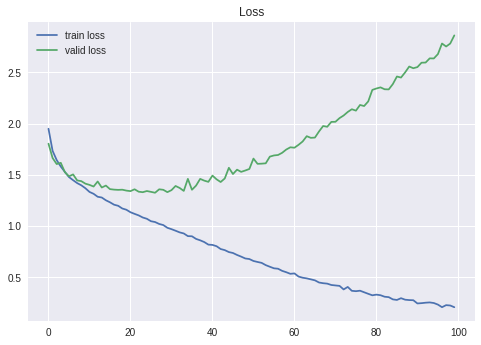

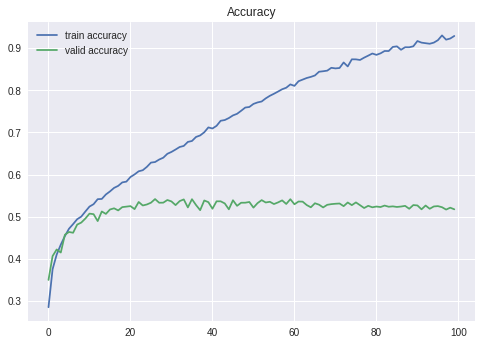

In [28]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [29]:
model5 = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128, 64, 32])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model5.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [31]:
model5.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 67us/step - loss: 2.0176 - acc: 0.2449 - val_loss: 1.9253 - val_acc: 0.3123
Epoch 2/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.7919 - acc: 0.3518 - val_loss: 1.7367 - val_acc: 0.3656
Epoch 3/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.7081 - acc: 0.3825 - val_loss: 1.6548 - val_acc: 0.4081
Epoch 4/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.6360 - acc: 0.4127 - val_loss: 1.6003 - val_acc: 0.4320
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5894 - acc: 0.4289 - val_loss: 1.5845 - val_acc: 0.4368
Epoch 6/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.5355 - acc: 0.4496 - val_loss: 1.5453 - val_acc: 0.4512
Epoch 7/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.4996 - acc: 0.4620 - val_loss: 1.5444 - 

In [0]:
train_loss5 = model5.history.history["loss"]
valid_loss5 = model5.history.history["val_loss"]

train_acc5 = model5.history.history["acc"]
valid_acc5 = model5.history.history["val_acc"]

plt.plot(range(len(train_loss5)), train_loss5, label="train loss")
plt.plot(range(len(valid_loss5)), valid_loss5, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc5)), train_acc5, label="train accuracy")
plt.plot(range(len(valid_acc5)), valid_acc5, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()